In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
import nltk

# Download stopwords (only need to run once)
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

In [2]:
# Cleaning text
def clean_text(text, remove_digits=True):
    stop_words = set(stopwords.words('english'))
    text = re.sub(r'<br\s*/><br\s*/>', ' ', text)
    pattern = r'[^a-zA-Z\s]' if remove_digits else r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [3]:
# Load dataset
imdb_data = pd.read_csv('IMDB Dataset.csv')

# Combine all reviews into a single string and clean the text
text = " ".join(review for review in imdb_data['review'])
text = clean_text(text)

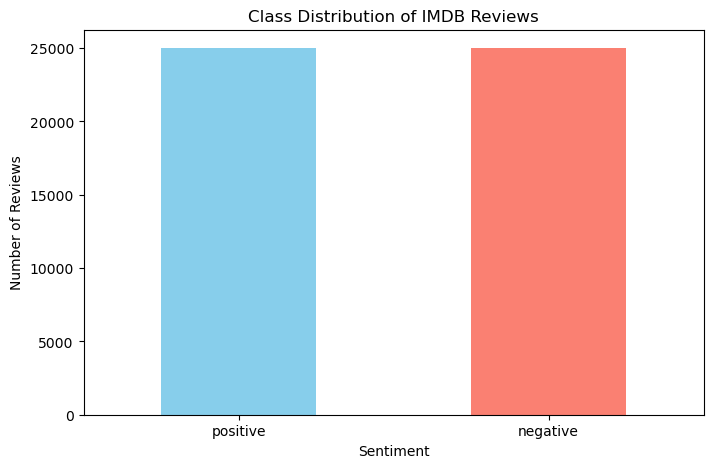

In [4]:
# Plotting class distribution of IMDb reviews
class_distribution = imdb_data['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of IMDB Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

232.84932
229.46456


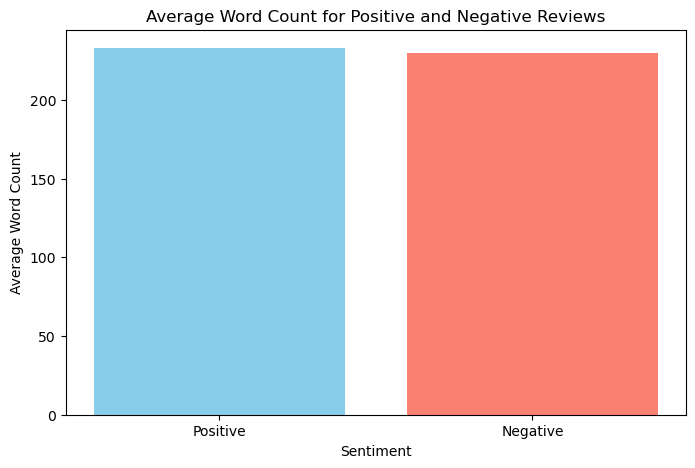

In [5]:
# Plotting average word count for positive and negative reviews
imdb_data['word_count'] = imdb_data['review'].apply(lambda x: len(x.split()))

positive_word_count = imdb_data[imdb_data['sentiment'] == 'positive']['word_count'].mean()
negative_word_count = imdb_data[imdb_data['sentiment'] == 'negative']['word_count'].mean()

print(positive_word_count)
print(negative_word_count)

word_counts = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative'],
    'Average Word Count': [positive_word_count, negative_word_count]
})

plt.figure(figsize=(8, 5))
plt.bar(word_counts['Sentiment'], word_counts['Average Word Count'], color=['skyblue', 'salmon'])
plt.title('Average Word Count for Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Average Word Count')
plt.show()

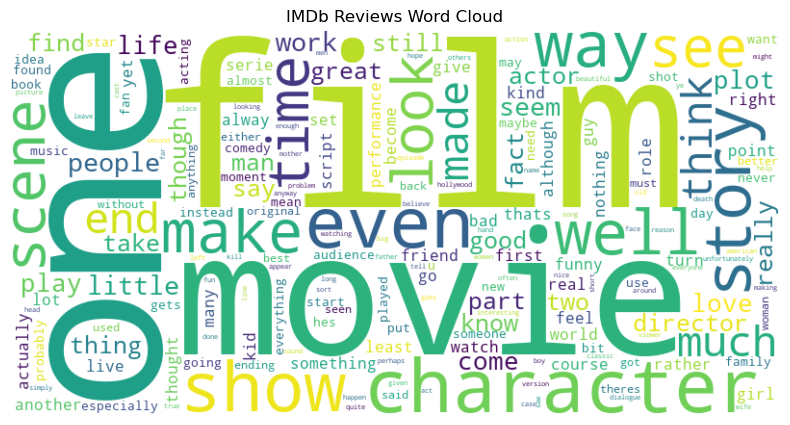

In [6]:
# IMDb Reviews Word Coud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("IMDb Reviews Word Cloud")
plt.axis('off')
plt.show()

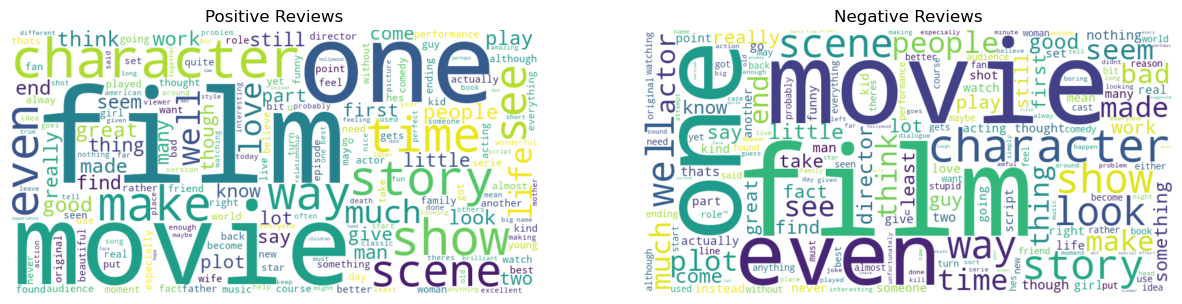

In [7]:
# IMDb Reviews Word Coud for Positive Reviews and Negative Reviews
positive_reviews = " ".join(clean_text(review) for review in imdb_data[imdb_data['sentiment'] == 'positive']['review'])
negative_reviews = " ".join(clean_text(review) for review in imdb_data[imdb_data['sentiment'] == 'negative']['review'])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Reviews")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Reviews")
plt.axis('off')

plt.show()

In [8]:
# Removing common words/neutral sentiment from IMDb movie reviews
def remove_common_words(text, common_words):
   for word in common_words:
       text = re.sub(rf'\b{word}\b', '', text)
   return text

def remove_neutral_sentiment_words(text):
    sid = SentimentIntensityAnalyzer()
    words = text.split()
    filtered_words = [word for word in words if sid.polarity_scores(word)['compound'] != 0]
    return ' '.join(filtered_words)
    
def get_top_n_words(text, n=15):
    words = text.split()
    word_freq = Counter(words)
    top_words = word_freq.most_common(n)
    top_words_df = pd.DataFrame(top_words, columns=['word', 'frequency'])
    
    return top_words_df

positive_reviews_cleaned = clean_text(" ".join(imdb_data[imdb_data['sentiment'] == 'positive']['review']))
negative_reviews_cleaned = clean_text(" ".join(imdb_data[imdb_data['sentiment'] == 'negative']['review']))

positive_reviews_cleaned = remove_neutral_sentiment_words(positive_reviews_cleaned)
negative_reviews_cleaned = remove_neutral_sentiment_words(negative_reviews_cleaned)

positive_top_words = get_top_n_words(positive_reviews_cleaned)
negative_top_words = get_top_n_words(negative_reviews_cleaned)

common_words = set(positive_top_words['word']).intersection(set(negative_top_words['word']))
common_words.update(['well','pretty', 'friend', 'interesting', 'original', 'sure', 'kind']) # Additional words that do not convey high sentiment

positive_reviews_cleaned = remove_common_words(positive_reviews_cleaned, common_words)
negative_reviews_cleaned = remove_common_words(negative_reviews_cleaned, common_words)

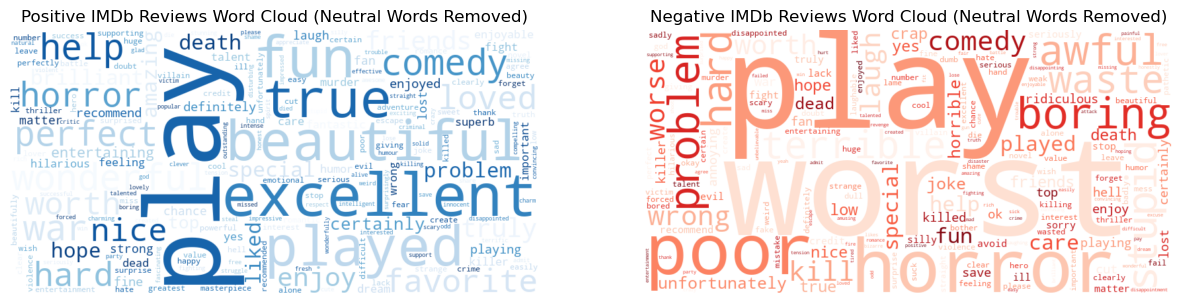

In [9]:
# IMDb Reviews Word Coud for Positive Reviews and Negative Reviews (No neutral/common words) 
positive_wordcloud_cleaned = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_reviews_cleaned)
negative_wordcloud_cleaned = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews_cleaned)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud_cleaned, interpolation='bilinear')
plt.title("Positive IMDb Reviews Word Cloud (Neutral Words Removed)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud_cleaned, interpolation='bilinear')
plt.title("Negative IMDb Reviews Word Cloud (Neutral Words Removed)")
plt.axis('off')

plt.show()